In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns", None)

## Task 1

In [2]:
data = pd.read_csv("C:/Users/hughp/Downloads/archive (4)/GlobalWeatherRepository.csv")

In [3]:
data.head() #dataset correctly downloaded

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


### A brief justification (3-4 lines) for why this dataset is suitable for weather-related analysis and predictions on a global scale:
The dataset is updated daily which ensures that there is a steady supply of new data that can be used for testing purposes.\
Complete dataset: no Null cells making it high quality, it is also reasonably well cleaned with minimal issues.\
Feature-rich data: There are many columns each with clear labels resulting in high readability making it well suited for analysis. \
Large scale: This data is highly valuable for global predictions as it includes data from 194 countries and worldwide locations.

## Task 2 - "Data Cleaning"

Our data is imported into a panda dataframe "data". Now we focus on cleaning the data

In [4]:
print("Number of Null cells in dataframe:",data.isnull().sum().sum())

Number of Null cells in dataframe: 0


As there are no Null cells we don't have any empty values to clean. But if there were we could either delete the row if it contains many Null values or simply take the mean average for numerical columns and the median average for non-numeric columns

In [5]:
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,29706.000000,29706.000000,2.970600e+04,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000
mean,19.132408,21.967629,1.722449e+09,25.791887,78.426998,8.572359,13.799963,176.413418,1012.385915,29.895058,0.160601,0.006129,60.939608,38.786003,27.378560,81.274692,9.773080,5.799165,5.332775,12.636313,20.338837,459.725284,65.089278,9.936046,7.202435,17.791282,33.454523,1.434559,1.960547,48.833266
std,24.486196,65.852618,3.888555e+06,7.155274,12.879565,11.892345,19.139139,100.290816,6.188722,0.182390,0.649562,0.025675,25.049155,32.753059,8.511615,15.319788,2.293225,1.415639,2.745630,12.719089,20.470094,1076.438298,42.877693,22.432733,60.667208,48.650446,77.115543,0.818308,1.983196,34.742362
min,-41.300000,-175.200000,1.715849e+09,-8.400000,16.900000,2.200000,3.600000,1.000000,978.000000,28.880000,0.000000,0.000000,2.000000,0.000000,-13.600000,7.500000,0.000000,0.000000,0.000000,2.200000,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.500000,0.500000,1.000000,1.000000,0.000000
25%,3.750000,-6.840000,1.719064e+09,22.200000,71.900000,4.300000,6.800000,93.000000,1009.000000,29.800000,0.000000,0.000000,41.000000,4.000000,23.700000,74.600000,10.000000,6.000000,4.000000,7.200000,11.600000,203.600000,34.300000,0.600000,0.500000,2.800000,5.100000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.722514e+09,26.700000,80.000000,7.800000,12.600000,173.000000,1013.000000,29.900000,0.000000,0.000000,66.000000,25.000000,28.100000,82.500000,10.000000,6.000000,6.000000,11.400000,18.400000,260.400000,60.100000,2.000000,1.500000,7.700000,13.100000,1.000000,1.000000,49.000000
75%,40.400000,49.882200,1.725798e+09,30.000000,86.000000,11.900000,19.100000,260.000000,1016.000000,30.000000,0.040000,0.000000,81.000000,75.000000,32.800000,91.000000,10.000000,6.000000,7.000000,16.300000,26.300000,397.200000,90.100000,7.585000,5.300000,18.200000,32.200000,2.000000,2.000000,83.000000
max,64.150000,179.220000,1.729071e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1045.000000,30.860000,27.820000,1.100000,100.000000,100.000000,51.200000,124.200000,32.000000,19.000000,14.300000,1845.700000,2970.400000,38879.398000,480.700000,427.700000,255.855000,1614.100000,1814.400000,6.000000,10.000000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29706 entries, 0 to 29705
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       29706 non-null  object 
 1   location_name                 29706 non-null  object 
 2   latitude                      29706 non-null  float64
 3   longitude                     29706 non-null  float64
 4   timezone                      29706 non-null  object 
 5   last_updated_epoch            29706 non-null  int64  
 6   last_updated                  29706 non-null  object 
 7   temperature_celsius           29706 non-null  float64
 8   temperature_fahrenheit        29706 non-null  float64
 9   condition_text                29706 non-null  object 
 10  wind_mph                      29706 non-null  float64
 11  wind_kph                      29706 non-null  float64
 12  wind_degree                   29706 non-null  int64  
 13  w

In [7]:
#As we have temperatures in both °C and °F, we remove °F. Similarily we have wind and gust speeds in both mph and kph, we remove mph.
#We have pressure in mb and in, we remove in.
#Now we have reduced the number of excess/duplicate columns by only using units that Met Éireann use.
cleaning_data= data.drop(columns=["temperature_fahrenheit","wind_mph","pressure_in","precip_in","feels_like_fahrenheit","visibility_miles","gust_mph"])

In [8]:
cleaning_data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,Partly Cloudy,13.3,338,NNW,1012.0,0.0,24,30,25.3,10.0,7.0,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,Partly cloudy,11.2,320,NW,1012.0,0.1,94,75,19.0,10.0,5.0,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,Sunny,15.1,280,W,1011.0,0.0,29,0,24.6,10.0,5.0,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,Light drizzle,11.9,215,SW,1007.0,0.3,61,100,3.8,2.0,2.0,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,Partly cloudy,13.0,150,SSE,1011.0,0.0,89,50,28.7,10.0,8.0,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


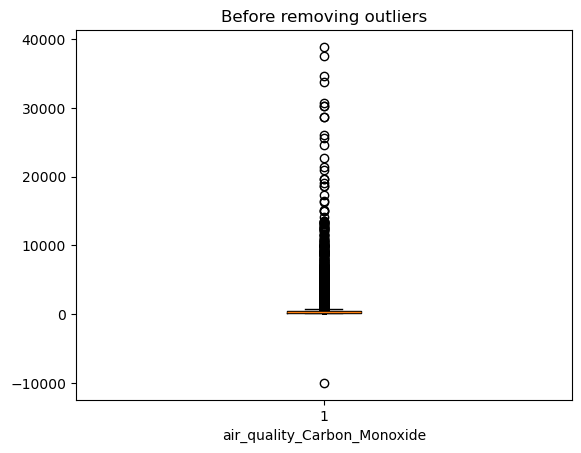

In [9]:
plt.boxplot(cleaning_data["air_quality_Carbon_Monoxide"])
plt.title("Before removing outliers")
plt.xlabel("air_quality_Carbon_Monoxide")
plt.show()

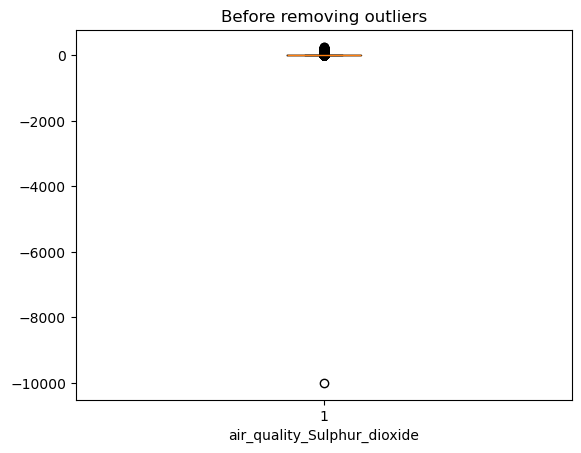

In [10]:
plt.boxplot(cleaning_data["air_quality_Sulphur_dioxide"])
plt.title("Before removing outliers")
plt.xlabel("air_quality_Sulphur_dioxide")
plt.show()

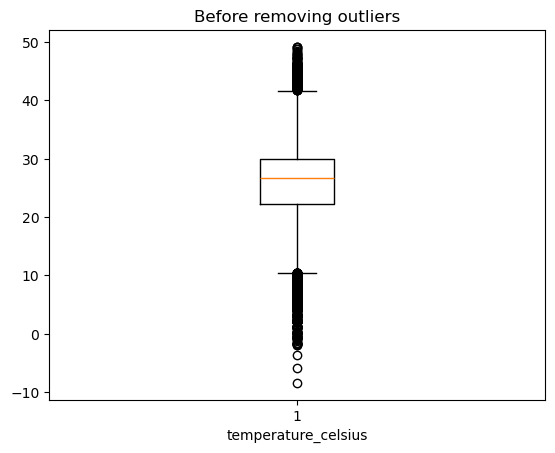

In [11]:
plt.boxplot(cleaning_data["temperature_celsius"])
plt.title("Before removing outliers")
plt.xlabel("temperature_celsius")
plt.show()

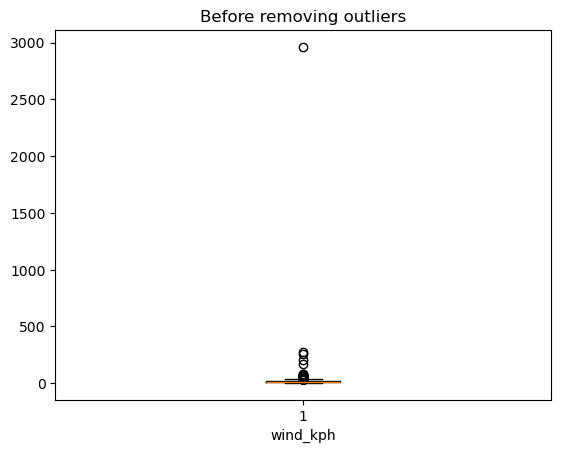

In [12]:
plt.boxplot(cleaning_data["wind_kph"])
plt.title("Before removing outliers")
plt.xlabel("wind_kph")
plt.show()

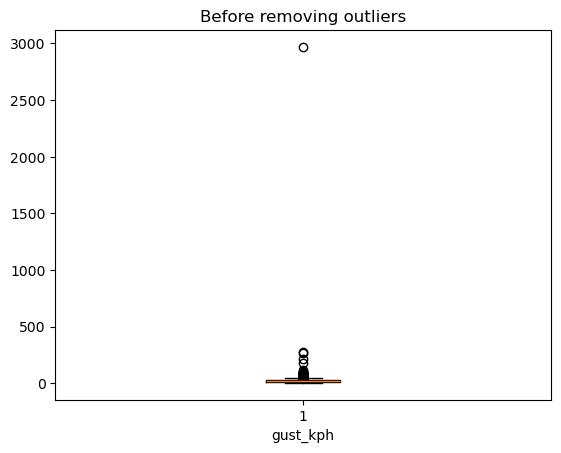

In [13]:
plt.boxplot(cleaning_data["gust_kph"])
plt.title("Before removing outliers")
plt.xlabel("gust_kph")
plt.show()

In [14]:
max(cleaning_data["wind_kph"])

2963.2

The highest wind speed ever recorded was ~405kph so this max value of 3000kph is most definitely falsly recorded, similar for the max value of gust_kph \
Lets look at all recorded wind and gust speeds > 150kph

In [15]:
cleaning_data[cleaning_data["wind_kph"]>150]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
834,Fiji Islands,Suva,-18.13,178.42,Pacific/Fiji,1716127200,2024-05-20 02:00,26.0,Partly cloudy,172.1,95,E,1011.0,0.04,100,75,29.9,10.0,1.0,179.3,156.9,3.1,1.2,0.7,3.3,5.5,1,1,06:26 AM,05:40 PM,02:45 PM,02:27 AM,Waxing Gibbous,81
1193,Burundi,Bujumbura,-3.38,29.36,Africa/Bujumbura,1716302700,2024-05-21 16:45,30.0,Partly cloudy,258.8,180,S,1013.0,0.18,55,25,34.9,10.0,6.0,266.0,317.1,44.7,0.5,0.3,5.9,11.2,1,1,06:01 AM,05:58 PM,04:20 PM,04:05 AM,Waxing Gibbous,93
7248,Ethiopia,Addis Ababa,9.03,38.70,Africa/Addis_Ababa,1718976600,2024-06-21 16:30,22.3,Partly cloudy,272.2,10,N,1025.0,0.97,57,75,24.7,8.0,4.0,279.4,303.8,46.5,1.2,1.2,17.3,112.3,2,2,06:07 AM,06:47 PM,06:24 PM,05:14 AM,Full Moon,99
7601,Burundi,Bujumbura,-3.38,29.36,Africa/Bujumbura,1719150300,2024-06-23 15:45,22.5,Partly cloudy,2963.2,180,S,1014.0,0.00,52,25,24.6,10.0,7.0,2970.4,277.0,52.2,0.6,0.2,5.3,7.2,1,1,06:07 AM,06:03 PM,07:36 PM,07:19 AM,Waning Gibbous,99
8675,Saint Kitts and Nevis,Basseterre,17.30,-62.72,America/St_Kitts,1719580500,2024-06-28 09:15,31.1,Partly cloudy,205.9,50,NE,1016.0,0.01,66,50,39.6,10.0,6.0,213.1,145.2,39.3,0.4,0.2,0.8,2.1,1,1,05:40 AM,06:49 PM,No moonrise,11:59 AM,Last Quarter,60


In [16]:
cleaning_data[cleaning_data["gust_kph"]>150]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
834,Fiji Islands,Suva,-18.13,178.42,Pacific/Fiji,1716127200,2024-05-20 02:00,26.0,Partly cloudy,172.1,95,E,1011.0,0.04,100,75,29.9,10.0,1.0,179.3,156.9,3.1,1.2,0.7,3.3,5.5,1,1,06:26 AM,05:40 PM,02:45 PM,02:27 AM,Waxing Gibbous,81
1193,Burundi,Bujumbura,-3.38,29.36,Africa/Bujumbura,1716302700,2024-05-21 16:45,30.0,Partly cloudy,258.8,180,S,1013.0,0.18,55,25,34.9,10.0,6.0,266.0,317.1,44.7,0.5,0.3,5.9,11.2,1,1,06:01 AM,05:58 PM,04:20 PM,04:05 AM,Waxing Gibbous,93
7248,Ethiopia,Addis Ababa,9.03,38.70,Africa/Addis_Ababa,1718976600,2024-06-21 16:30,22.3,Partly cloudy,272.2,10,N,1025.0,0.97,57,75,24.7,8.0,4.0,279.4,303.8,46.5,1.2,1.2,17.3,112.3,2,2,06:07 AM,06:47 PM,06:24 PM,05:14 AM,Full Moon,99
7601,Burundi,Bujumbura,-3.38,29.36,Africa/Bujumbura,1719150300,2024-06-23 15:45,22.5,Partly cloudy,2963.2,180,S,1014.0,0.00,52,25,24.6,10.0,7.0,2970.4,277.0,52.2,0.6,0.2,5.3,7.2,1,1,06:07 AM,06:03 PM,07:36 PM,07:19 AM,Waning Gibbous,99
8675,Saint Kitts and Nevis,Basseterre,17.30,-62.72,America/St_Kitts,1719580500,2024-06-28 09:15,31.1,Partly cloudy,205.9,50,NE,1016.0,0.01,66,50,39.6,10.0,6.0,213.1,145.2,39.3,0.4,0.2,0.8,2.1,1,1,05:40 AM,06:49 PM,No moonrise,11:59 AM,Last Quarter,60


In [17]:
#After some research none of these places had extremely high wind speeds. We replace these outliers with the averages for the location
cleaning_data.loc[7601:7602,"wind_kph"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Bujumbura"]["wind_kph"])
cleaning_data.loc[834:835,"wind_kph"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Suva"]["wind_kph"])
cleaning_data.loc[1193:1194,"wind_kph"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Bujumbura"]["wind_kph"])
cleaning_data.loc[7248:7249,"wind_kph"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Addis Ababa"]["wind_kph"])
cleaning_data.loc[8675:8676,"wind_kph"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Basseterre"]["wind_kph"])
#And again for gust speeds:
cleaning_data.loc[7601:7602,"gust_kph"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Bujumbura"]["gust_kph"])
cleaning_data.loc[834:835,"gust_kph"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Suva"]["gust_kph"])
cleaning_data.loc[1193:1194,"gust_kph"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Bujumbura"]["gust_kph"])
cleaning_data.loc[7248:7249,"gust_kph"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Addis Ababa"]["gust_kph"])
cleaning_data.loc[8675:8676,"gust_kph"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Basseterre"]["gust_kph"])

We review the wind and gust speeds boxplot:

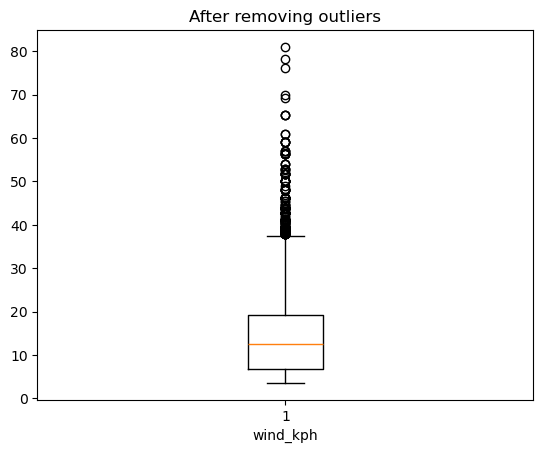

In [18]:
plt.boxplot(cleaning_data["wind_kph"])
plt.title("After removing outliers")
plt.xlabel("wind_kph")
plt.show()

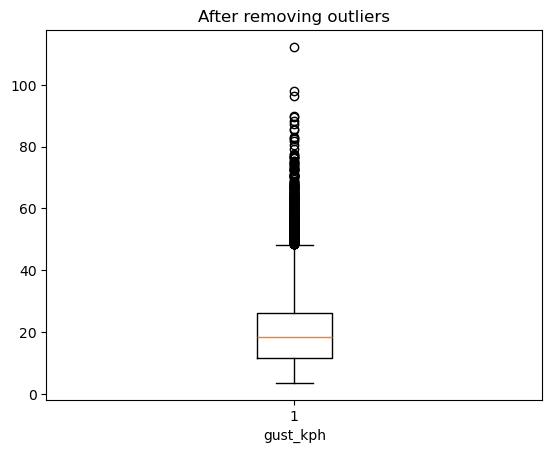

In [19]:
plt.boxplot(cleaning_data["gust_kph"])
plt.title("After removing outliers")
plt.xlabel("gust_kph")
plt.show()

In [20]:
cleaning_data[cleaning_data["air_quality_Carbon_Monoxide"]==min(cleaning_data["air_quality_Carbon_Monoxide"])]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
5263,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1718114400,2024-06-11 10:00,30.3,Partly cloudy,16.9,90,E,1017.0,0.0,70,75,36.6,10.0,1.0,38.4,-9999.0,32.5,0.4,0.4,2.3,12.1,1,1,05:33 AM,06:41 PM,10:07 AM,11:11 PM,Waxing Crescent,21


In [21]:
cleaning_data.loc[5263:5264,"air_quality_Carbon_Monoxide"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Saint John's"]["air_quality_Carbon_Monoxide"])

In [22]:
cleaning_data[5263:5264]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
5263,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1718114400,2024-06-11 10:00,30.3,Partly cloudy,16.9,90,E,1017.0,0.0,70,75,36.6,10.0,1.0,38.4,133.933841,32.5,0.4,0.4,2.3,12.1,1,1,05:33 AM,06:41 PM,10:07 AM,11:11 PM,Waxing Crescent,21


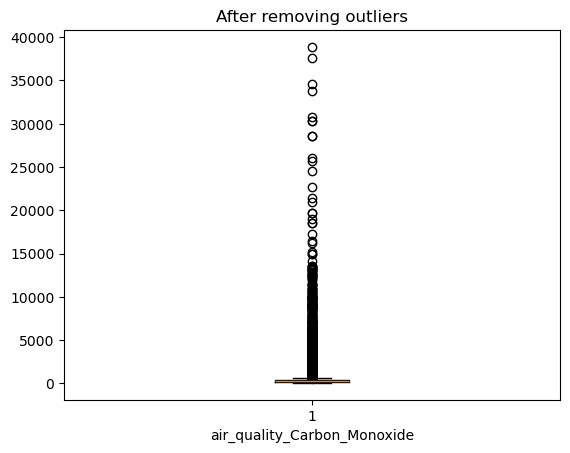

In [23]:
plt.boxplot(cleaning_data["air_quality_Carbon_Monoxide"])
plt.title("After removing outliers")
plt.xlabel("air_quality_Carbon_Monoxide")
plt.show()

In [24]:
cleaning_data[cleaning_data["air_quality_Sulphur_dioxide"]==min(cleaning_data["air_quality_Sulphur_dioxide"])]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
12078,Kiribati,Tarawa,-0.88,169.53,Pacific/Tarawa,1721133900,2024-07-17 00:45,28.6,Light rain shower,19.1,89,E,1008.0,0.37,77,85,33.1,10.0,1.0,25.7,223.6,14.5,0.0,-9999.0,0.5,0.9,1,1,06:46 AM,06:50 PM,02:01 PM,01:40 AM,Waxing Gibbous,69


In [25]:
cleaning_data.loc[12078:12079,"air_quality_Sulphur_dioxide"]=np.mean(cleaning_data[cleaning_data["location_name"]=="Tarawa"]["air_quality_Sulphur_dioxide"])

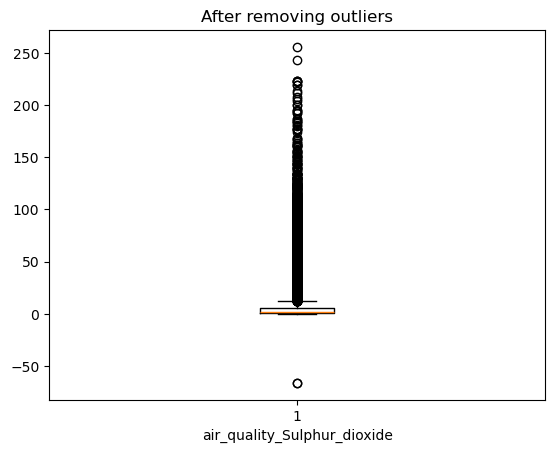

In [26]:
plt.boxplot(cleaning_data["air_quality_Sulphur_dioxide"])
plt.title("After removing outliers")
plt.xlabel("air_quality_Sulphur_dioxide")
plt.show()

Further cleaning: checking for duplicates in names or incorrect titles

In [28]:
print(sorted(set(cleaning_data["country"])))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Bélgica', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Estonie', 'Ethiopia', 'Fiji Islands', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'Inde', 'India', 'Indonesia', 'Iran', 'Ir

## Proposed changes:
Change Südkorea -> South Korea (Changing from German to english) \
Bélgica -> Belgium (Changing from Dutch to English) \
كولومبيا -> Colombia \
Гватемала -> Guatemala \Польша, Polônia -> Poland\
火鸡, Турция -> Turkey\
Saint-Vincent-et-les-Grenadines -> Saint Vincent and the Grenadines \
Mexique -> Mexico \
Malásia -> Malaysia \
Saudi Arabien -> Saudi Arabia \
USA United States of America -> United States of America \
Turkménistan -> Turkmenistan \
Jemen -> Yemen \
Estonie -> Estonia


In [29]:
#Implementing corrections
cleaning_data['country'] = cleaning_data['country'].replace('Südkorea', 'South Korea')
cleaning_data['country'] = cleaning_data['country'].replace('Bélgica', 'Belgium')
cleaning_data['country'] = cleaning_data['country'].replace('كولومبيا', 'Colombia')
cleaning_data['country'] = cleaning_data['country'].replace('Гватемала', 'Guatemala')
cleaning_data['country'] = cleaning_data['country'].replace('Польша', 'Poland')
cleaning_data['country'] = cleaning_data['country'].replace('Polônia', 'Poland')
cleaning_data['country'] = cleaning_data['country'].replace('火鸡', 'Turkey')
cleaning_data['country'] = cleaning_data['country'].replace('Турция', 'Turkey')
cleaning_data['country'] = cleaning_data['country'].replace('Saint-Vincent-et-les-Grenadines', 'Saint Vincent and the Grenadines')
cleaning_data['country'] = cleaning_data['country'].replace('Mexique', 'Mexico')
cleaning_data['country'] = cleaning_data['country'].replace('Malásia', 'Malaysia')
cleaning_data['country'] = cleaning_data['country'].replace('Saudi Arabien', 'Saudi Arabia')
cleaning_data['country'] = cleaning_data['country'].replace('USA United States of America', 'United States of America')
cleaning_data['country'] = cleaning_data['country'].replace('Turkménistan', 'Turkmenistan')
cleaning_data['country'] = cleaning_data['country'].replace('Jemen', 'Yemen')
cleaning_data['country'] = cleaning_data['country'].replace('Estonie', 'Estonia')

In [37]:
print(sorted(set(cleaning_data["country"])))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji Islands', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'Inde', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israe

## Writing cleaning_data to a new csv named "cleaned_data.csv" currently found in downloads but will be available in the github repo. 

In [31]:
cleaning_data.to_csv("C:/Users/hughp/Downloads/cleaned_data.csv",index=False)

## Summary of dataset

In [32]:
cleaning_data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,29706.000000,29706.000000,2.970600e+04,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000,29706.000000
mean,19.132408,21.967629,1.722449e+09,25.791887,13.673675,176.413418,1012.385915,0.160601,60.939608,38.786003,27.378560,9.773080,5.332775,20.212696,460.060336,65.089278,9.936046,7.534458,17.791282,33.454523,1.434559,1.960547,48.833266
std,24.486196,65.852618,3.888555e+06,7.155274,8.192986,100.290816,6.188722,0.649562,25.049155,32.753059,8.511615,2.293225,2.745630,10.939525,1074.729432,42.877693,22.432733,17.611004,48.650446,77.115543,0.818308,1.983196,34.742362
min,-41.300000,-175.200000,1.715849e+09,-8.400000,3.600000,1.000000,978.000000,0.000000,2.000000,0.000000,-13.600000,0.000000,0.000000,3.600000,81.000000,0.000000,0.000000,-66.112748,0.500000,0.500000,1.000000,1.000000,0.000000
25%,3.750000,-6.840000,1.719064e+09,22.200000,6.800000,93.000000,1009.000000,0.000000,41.000000,4.000000,23.700000,10.000000,4.000000,11.600000,203.600000,34.300000,0.600000,0.500000,2.800000,5.100000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.722514e+09,26.700000,12.600000,173.000000,1013.000000,0.000000,66.000000,25.000000,28.100000,10.000000,6.000000,18.400000,260.400000,60.100000,2.000000,1.500000,7.700000,13.100000,1.000000,1.000000,49.000000
75%,40.400000,49.882200,1.725798e+09,30.000000,19.100000,260.000000,1016.000000,0.040000,81.000000,75.000000,32.800000,10.000000,7.000000,26.300000,397.200000,90.100000,7.585000,5.300000,18.200000,32.200000,2.000000,2.000000,83.000000
max,64.150000,179.220000,1.729071e+09,49.200000,81.000000,360.000000,1045.000000,27.820000,100.000000,100.000000,51.200000,32.000000,14.300000,112.300000,38879.398000,480.700000,427.700000,255.855000,1614.100000,1814.400000,6.000000,10.000000,100.000000


#### Extra summaries below

In [33]:
print("The dataset shows that global temperatures in degrees celcius had an average of",round(np.mean(cleaning_data["temperature_celsius"]),2),
      ",a minimum of",min(cleaning_data["temperature_celsius"]),
      "and a maximum of:",max(cleaning_data["temperature_celsius"]))

The dataset shows that global temperatures in degrees celcius had an average of 25.79 ,a minimum of -8.4 and a maximum of: 49.2


In [34]:
print("The dataset shows that global windspeeds in kph had an average of",round(np.mean(cleaning_data["wind_kph"]),2),
      ",a minimum of",min(cleaning_data["wind_kph"]),
      "and a maximum of:",max(cleaning_data["wind_kph"]))

The dataset shows that global windspeeds in kph had an average of 13.67 ,a minimum of 3.6 and a maximum of: 81.0


In [35]:
print("The dataset shows that global precipitation in milimetres of rainfall had an average of",round(np.mean(cleaning_data["precip_mm"]),2),
      ",a minimum of",min(cleaning_data["precip_mm"]),
      "and a maximum of:",max(cleaning_data["precip_mm"]))

The dataset shows that global precipitation in milimetres of rainfall had an average of 0.16 ,a minimum of 0.0 and a maximum of: 27.82


## Notes for hugh: 
come back to the outliers problem might have to remove more than just the max/min \
